In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load Dataset


In [ ]:
path = "/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv"
df = pd.read_csv(path)
df.head(20)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
5,504313,55,0,13.7,6,14.05.21,12.467,1,364,1,0,0
6,504314,17,1,30.7,6,09.01.21,2.456,0,654,0,0,0
7,504315,30,1,8.1,7,28.03.21,6.561,3,1011,0,0,0
8,504316,51,0,18.0,4,04.08.21,11.880,0,312,3,1,0
9,504317,63,1,19.2,4,06.10.21,11.904,3,828,0,0,0


# **SVM**


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
X = df[['Age', 'Revenue_Total', 'N_Purchases', 'Time_Spent']]  # Add other features as needed
y = df['Revenue_Total']  # Replace with your target variable name

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.svm import SVR  # Import Support Vector Regressor

model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)


In [ ]:

df['Gender'] = df['Gender'].astype('category')
data = pd.get_dummies(df, columns=['Gender', 'Pay_Method', 'Browser', 'Newsletter'], drop_first=True)

X = data.drop(['Customer_id', 'Purchase_DATE', 'Revenue_Total'], axis=1)  # Features
y = (df['Revenue_Total'] > 30).astype(int)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[5374 1128]
 [2326 4332]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      6502
           1       0.79      0.65      0.71      6658

    accuracy                           0.74     13160
   macro avg       0.75      0.74      0.74     13160
weighted avg       0.75      0.74      0.74     13160



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")


Accuracy of the SVM model: 73.75%


# **Logistic** **Regression**

### Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = '/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv'
data = pd.read_csv(file_path)


In [ ]:
data['High_Value_Customer'] = (data['Revenue_Total'] > 50).astype(int)
features = data.drop(columns=['Customer_id', 'Purchase_DATE', 'High_Value_Customer', 'Revenue_Total'])  # Exclude target-derived or identifier columns
target = data['High_Value_Customer']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)


### Training Model

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Section 3: Train Logistic Regression Model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred_log = log_reg.predict(X_test_scaled)

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)
print("Logistic Regression Accuracy Percentage:", accuracy_log * 100, "%")


Logistic Regression Accuracy: 0.7362581691068443
Logistic Regression Accuracy Percentage: 73.62581691068442 %


In [ ]:
# Perform cross-validation for robust evaluation
cv_scores_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores_log)
print("Mean Cross-Validation Accuracy:", cv_scores_log.mean())

Cross-Validation Accuracy Scores: [0.73219713 0.72915762 0.72771686 0.73401368 0.73640213]
Mean Cross-Validation Accuracy: 0.7318974844261282



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84     18087
           1       0.19      0.66      0.29      1652

    accuracy                           0.74     19739
   macro avg       0.57      0.70      0.57     19739
weighted avg       0.90      0.74      0.79     19739



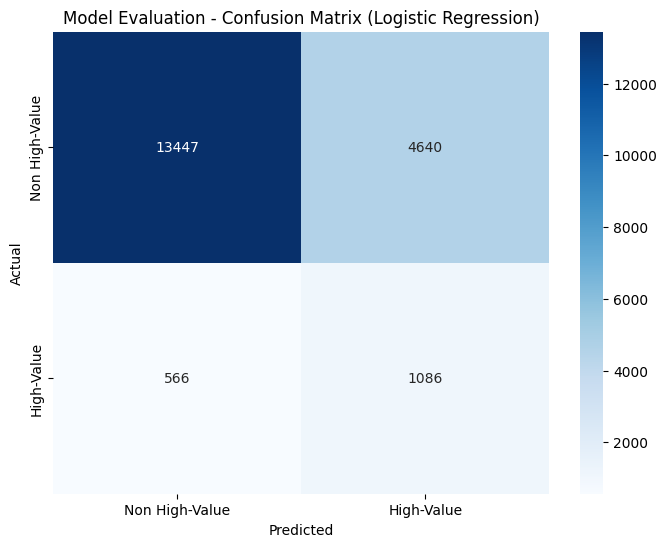

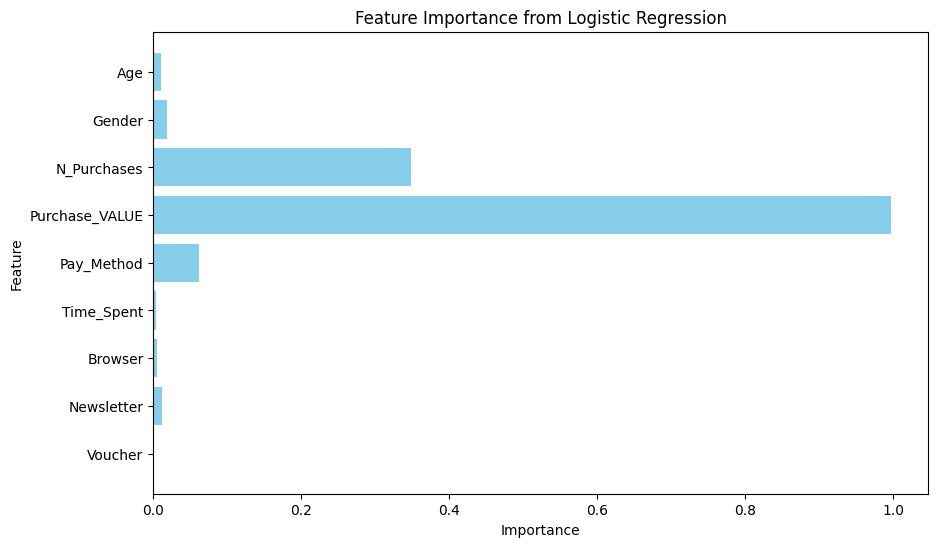

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=['Non High-Value', 'High-Value'], yticklabels=['Non High-Value', 'High-Value'])
plt.title("Model Evaluation - Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_importance_log = abs(log_reg.coef_[0])
feature_names = features.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_log, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

# Random Forest

### Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv'
data = pd.read_csv(file_path)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Train Random Forest Model
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Accuracy Percentage:", accuracy_rf * 100, "%")


Random Forest Accuracy: 0.9413344141040579
Random Forest Accuracy Percentage: 94.1334414104058 %


In [ ]:
cv_scores = cross_val_score(rf_clf, features, target, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.94103343 0.93988905 0.94194088 0.93981306 0.93783722]
Mean Cross-Validation Accuracy: 0.9401027276626698


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18087
           1       0.88      0.35      0.50      1652

    accuracy                           0.94     19739
   macro avg       0.91      0.67      0.73     19739
weighted avg       0.94      0.94      0.93     19739



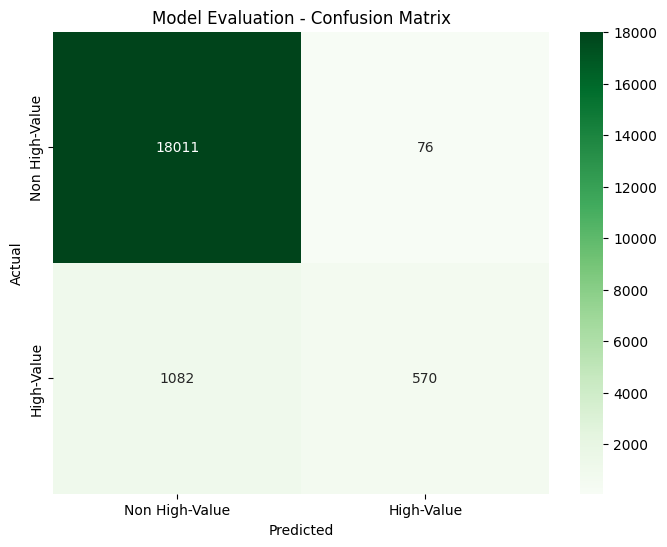

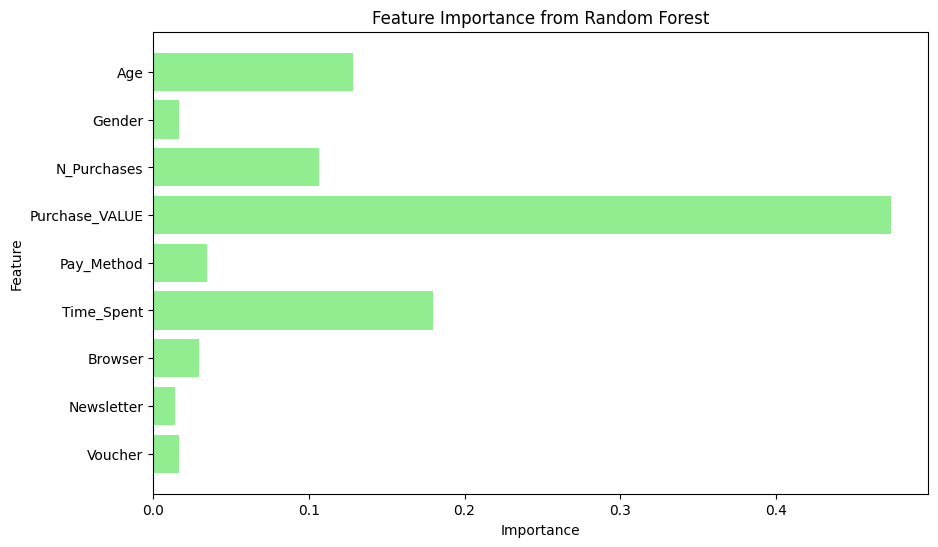

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Non High-Value', 'High-Value'], yticklabels=['Non High-Value', 'High-Value'])
plt.title("Model Evaluation - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization
feature_importances = rf_clf.feature_importances_
feature_names = features.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# **Decision** **Tree**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv'
data = pd.read_csv(file_path)

In [ ]:
data['High_Value_Customer'] = (data['Revenue_Total'] > 50).astype(int)
features = data.drop(columns=['Customer_id', 'Purchase_DATE', 'High_Value_Customer', 'Revenue_Total'])
target = data['High_Value_Customer']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)
# Train Decision Tree Model
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [ ]:
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Accuracy Percentage:", accuracy_dt * 100, "%")

Decision Tree Accuracy: 0.9018187344850296
Decision Tree Accuracy Percentage: 90.18187344850296 %


In [ ]:
cv_scores_dt = cross_val_score(dt_clf, features, target, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores_dt)
print("Mean Cross-Validation Accuracy:", cv_scores_dt.mean())
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Cross-Validation Accuracy Scores: [0.90182371 0.89816855 0.89778859 0.89794057 0.89740862]
Mean Cross-Validation Accuracy: 0.898626007694989

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     18087
           1       0.41      0.40      0.41      1652

    accuracy                           0.90     19739
   macro avg       0.68      0.67      0.68     19739
weighted avg       0.90      0.90      0.90     19739



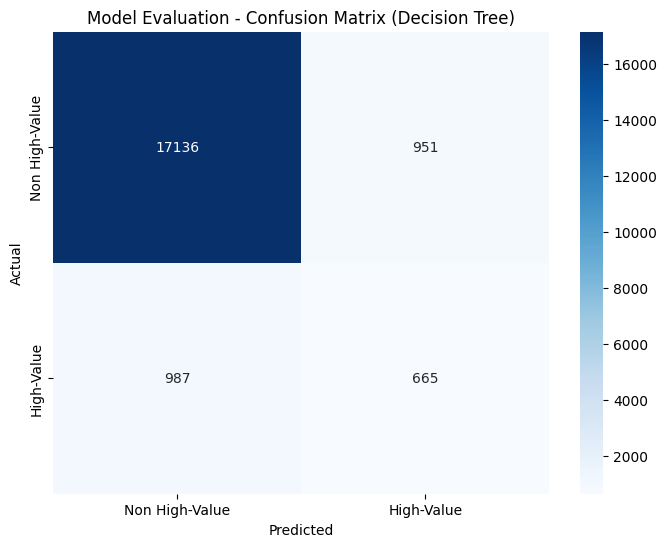

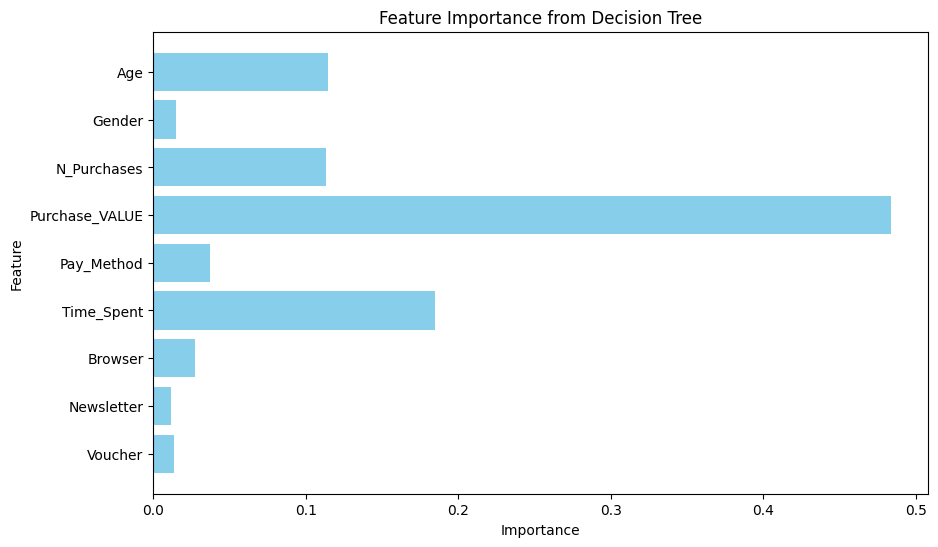

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Non High-Value', 'High-Value'], yticklabels=['Non High-Value', 'High-Value'])
plt.title("Model Evaluation - Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization
feature_importances_dt = dt_clf.feature_importances_
feature_names = features.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances_dt, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

# **KNN**

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
data['High_Value_Customer'] = (data['Revenue_Total'] > 50).astype(int)
target = data['High_Value_Customer']

features = data.drop(columns=['Customer_id', 'Purchase_DATE', 'High_Value_Customer'])
feature_names = features.columns


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)




In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn * 100, "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 96.266274887279 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18087
           1       0.92      0.61      0.73      1652

    accuracy                           0.96     19739
   macro avg       0.94      0.80      0.86     19739
weighted avg       0.96      0.96      0.96     19739



### Feature Importance

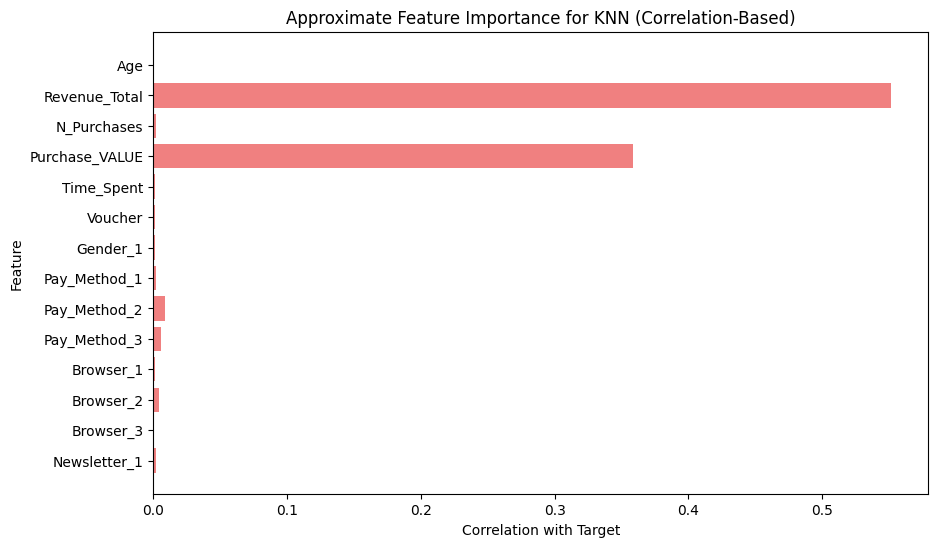

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_importance = np.abs(data.drop(columns=['Customer_id', 'Purchase_DATE', 'High_Value_Customer']).corrwith(data['High_Value_Customer']))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance.values, color='lightcoral')
plt.xlabel('Correlation with Target')
plt.ylabel('Feature')
plt.title('Approximate Feature Importance for KNN (Correlation-Based)')
plt.gca().invert_yaxis()
plt.show()



# **Accuracy Comparisons**

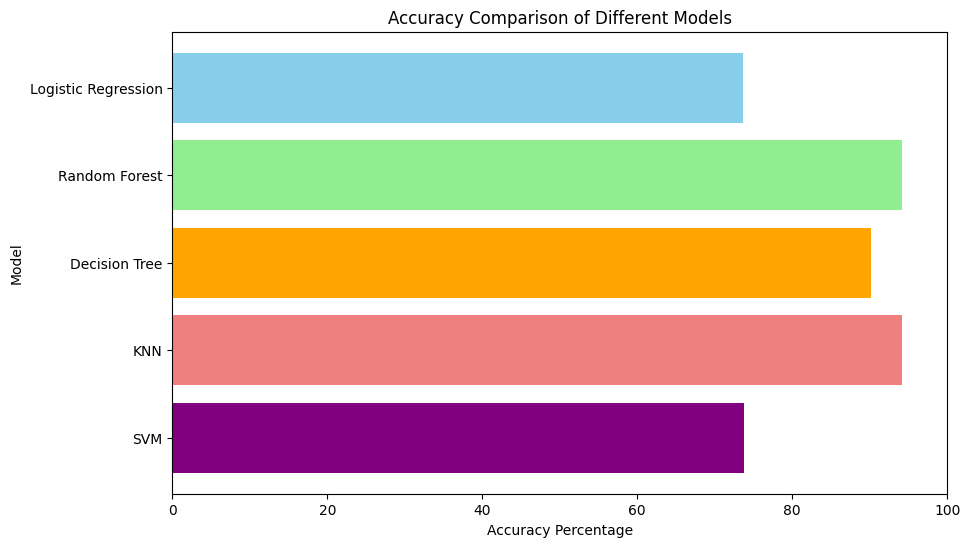

In [ ]:
import matplotlib.pyplot as plt


accuracy_log = 73.62
accuracy_rf = 94.13
accuracy_dt = 90.19
accuracy_knn = 94.20
accuracy_svm = 73.75


models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN', 'SVM']
accuracies = [accuracy_log, accuracy_rf, accuracy_dt, accuracy_knn, accuracy_svm]


plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'lightcoral', 'purple'])
plt.xlabel('Accuracy Percentage')
plt.ylabel('Model')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0, 100)  # Set the x-axis range for better visualization
plt.gca().invert_yaxis()  # Invert the y-axis for descending order
plt.show()



In [ ]:
# Get the feature columns used for training
trained_features = X_train.columns  # Ensure this matches features during training

# Filter the test set to use the same features
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)[trained_features]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 800x600 with 0 Axes>

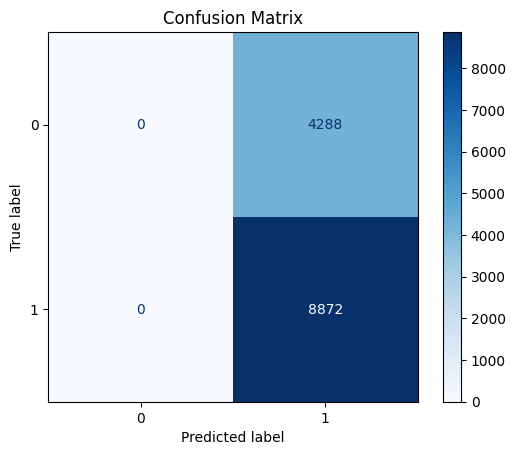

Accuracy: 0.67
Precision: 0.67
Recall: 1.00
F1 Score: 0.81


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('/content/drive/MyDrive/online sales/Online Shop Customer Sales Data.csv')

data['Purchase_DATE'] = pd.to_datetime(data['Purchase_DATE'], format='%d.%m.%y', errors='coerce')
data.drop(columns=['Customer_id', 'Purchase_DATE'], inplace=True)
X = data.drop(columns=['Gender'])
y = data['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
